<a href="https://colab.research.google.com/github/jtowgood/DAT490Capstone/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
alcohol_path = "/content/drive/My Drive/DAT 490 Capstone/iowa_compressed.csv"

In [ ]:
# import libraries
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# create dataframe for liquor sales, income, population size
df_sales = pd.read_csv(alcohol_path)

## Alcohol Sales Data

In [ ]:
df_sales.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-15941000030,11/28/2018,2536,HY-VEE / PLEASANT HILL,4815 MAPLE DRIVE,PLEASANT HILL,50317.0,POINT (-93.519187 41.598109),77.0,POLK,...,26586,GENTLEMAN JACK,12,750,20.01,30.02,2,60.04,1.50,0.39
1,INV-72674800099,07/29/2024,10165,SUPER MARKET / DAVENPORT,6723 NORTHWEST BOULEVARD,DAVENPORT,52806,POINT (-90.608956036 41.589559983),NaN,SCOTT,...,80365,OLE SMOKY WHITE CHOCOLATE STRAWBERRY CREAM,6,750,13.00,19.50,1,19.50,0.75,0.19
2,INV-23115800035,11/08/2019,5851,CASEY'S GENERAL STORE #74 - MORNING SUN,618 S CHURCH STREET,MORNING SUN,52640,POINT (-91.254443 41.089418),58.0,LOUISA,...,64858,FIREBALL CINNAMON WHISKEY MINI DISPENSER,1,50,30.00,45.00,1,45.00,0.05,0.01
3,S18074600012,03/25/2014,4490,CASEY'S GENERAL STORE #2766 / CEDAR,380 33RD AVE SW,CEDAR RAPIDS,52404,POINT (-91.67222100000001 41.944954),57.0,LINN,...,26826,JACK DANIELS OLD #7 BLACK LBL,12,750,14.04,21.05,3,63.15,2.25,0.59
4,INV-29537400055,08/18/2020,2535,HY-VEE FOOD STORE #1 / WDM,1700 VALLEY WEST DR,WEST DES MOINES,50265.0,NaN,77.0,POLK,...,88296,PATRON SILVER,12,750,27.50,41.25,1,41.25,0.75,0.19


In [ ]:
# column names
df_sales.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [ ]:
# data info, dtype of each column
# some columns have missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Invoice/Item Number    500000 non-null  object 
 1   Date                   500000 non-null  object 
 2   Store Number           500000 non-null  int64  
 3   Store Name             500000 non-null  object 
 4   Address                498607 non-null  object 
 5   City                   498607 non-null  object 
 6   Zip Code               498606 non-null  object 
 7   Store Location         458648 non-null  object 
 8   County Number          403838 non-null  float64
 9   County                 497361 non-null  object 
 10  Category               499717 non-null  float64
 11  Category Name          499575 non-null  object 
 12  Vendor Number          500000 non-null  float64
 13  Vendor Name            500000 non-null  object 
 14  Item Number            500000 non-nu

In [ ]:
# drop data columns
drop_columns = ['Invoice/Item Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Volume Sold (Liters)',
       'Volume Sold (Gallons)', 'Store Number', 'County', 'Item Description']

df_sales.drop(drop_columns, axis=1, inplace=True)

# checking for missing values
print(df_sales.isna().sum())

Date              0
Sale (Dollars)    0
dtype: int64


In [ ]:
# drop na/null values
df_sales.dropna(inplace=True)
print(df_sales.isna().sum())

print(df_sales.shape)

Date              0
Sale (Dollars)    0
dtype: int64
(500000, 2)


In [ ]:
# change date format to month and year
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

df_sales.head()

,Date,Sale (Dollars)
0,2018-11-28,60.04
1,2024-07-29,19.50
2,2019-11-08,45.00
3,2014-03-25,63.15
4,2020-08-18,41.25


## Time Series Analysis


AR - autoregressive, the time series is linearly regressed on its own past values

I - integrated, if not stationary the time series can be diffenced to become stationary

MA - moving average, the time series can be regresssed on the past forecast errors

In [ ]:
df_alcohol = df_sales.copy()

In [ ]:
# order data chronologically
df_alcohol.sort_values(by='Date', inplace=True)

In [ ]:
# daily
#df_temp = df_alcohol.set_index('Date')
#df_timeseries = df_temp.resample('D').mean().dropna()
#df_timeseries.rename(columns={'Sale (Dollars)': 'Sales'}, inplace=True)
#df_timeseries.head()

In [ ]:
# monthly
df_temp = df_alcohol.set_index('Date')
df_timeseries = df_temp.resample('M').mean()
df_timeseries.rename(columns={'Sale (Dollars)': 'Sales'}, inplace=True)
df_timeseries.head()

<ipython-input-14-732712e75083>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_timeseries = df_temp.resample('M').mean()


,Sales
Date,
2012-01-31,101.119912
2012-02-29,115.128578
2012-03-31,110.548983
2012-04-30,118.623991
2012-05-31,111.839279


For the time series analysis and future sales forecasting, the first step was to visually inspect the sales data. Plotting the montly average sales data revealed that the data potentially has both trend and seasonality.

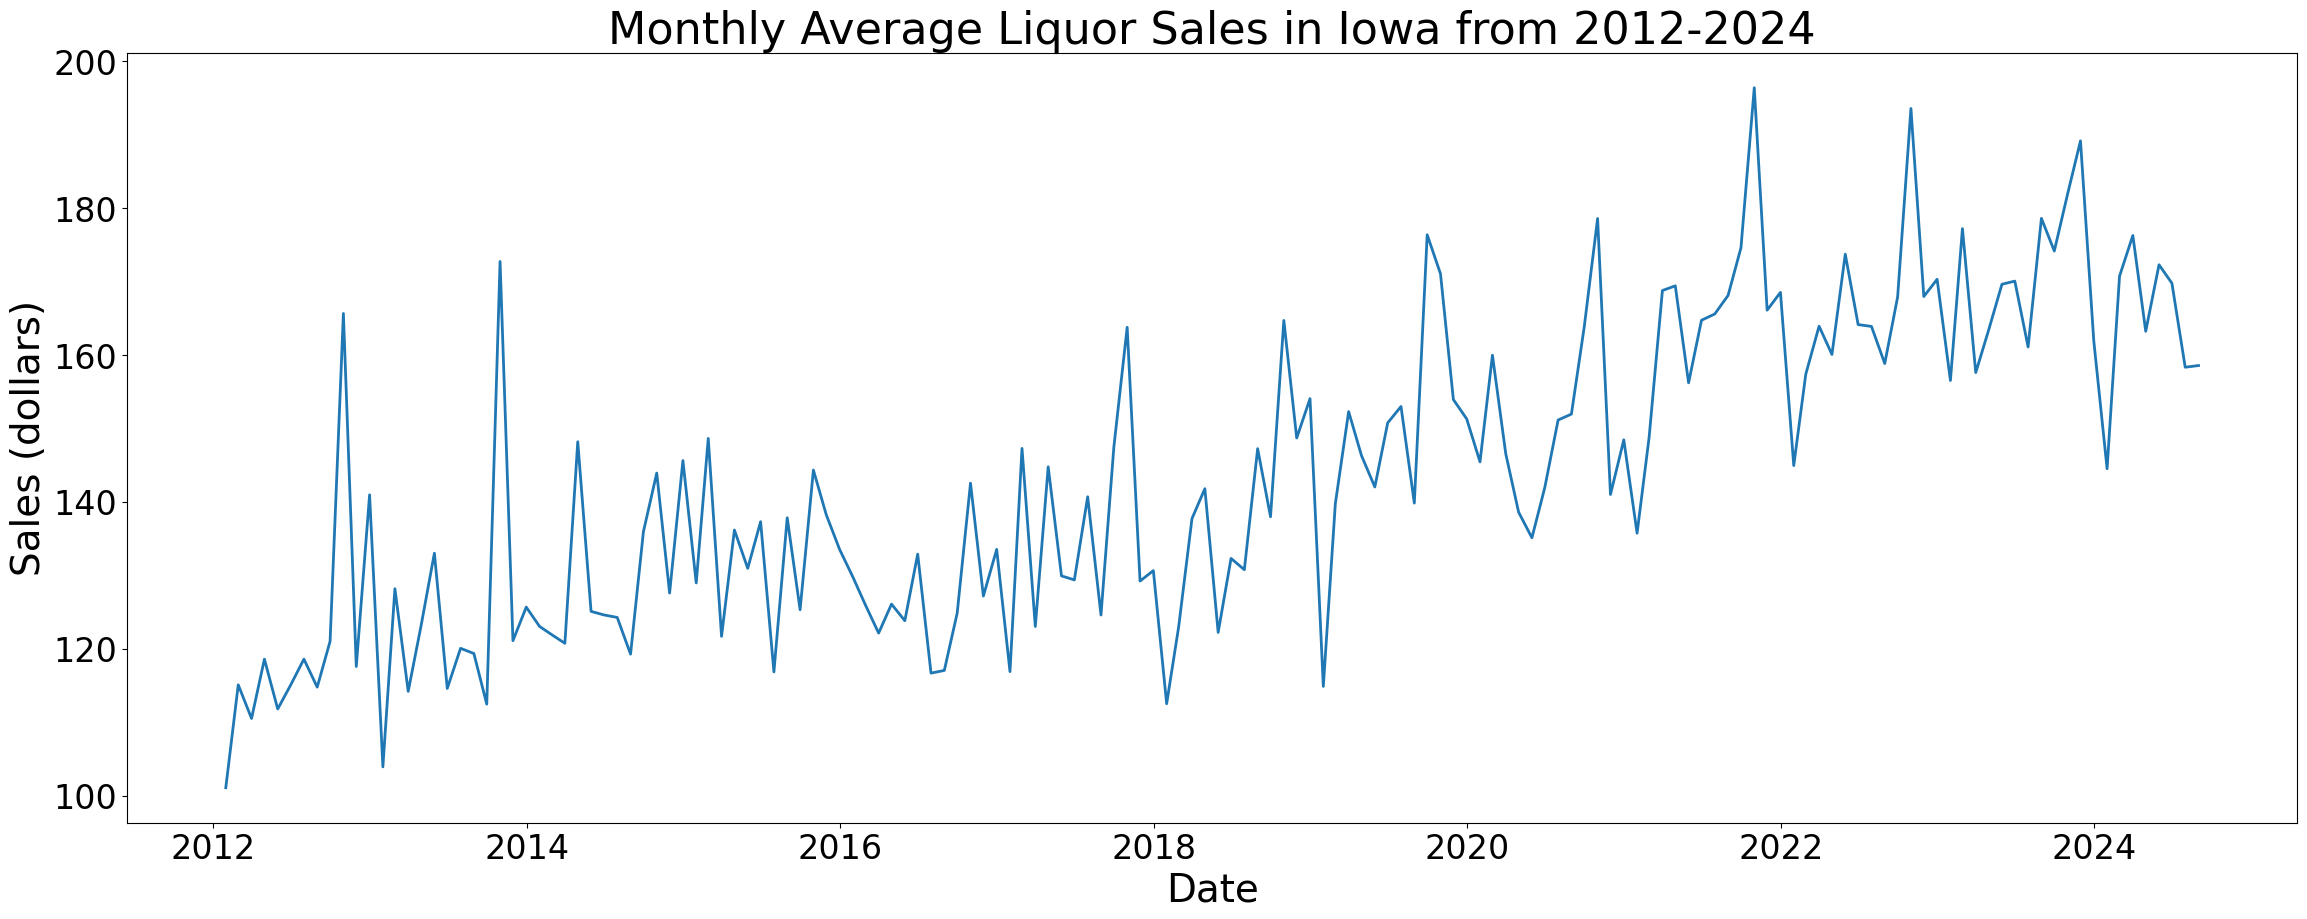

In [ ]:
fig, ax = plt.subplots(figsize = (28,10))
ax.plot(df_timeseries['Sales'], linewidth = 2)
plt.xlabel("Date", fontsize = 28)
plt.xticks(fontsize = 24)
plt.ylabel("Sales (dollars)", fontsize = 28)
plt.yticks(fontsize = 24)
plt.title("Monthly Average Liquor Sales in Iowa from 2012-2024", fontsize = 32)
plt.show()

To better visualize these components within the time series, the seasonal_decompose function is utilized which breaks down the seasonal components. Figure (num) confirms that this datasets contains a trend and seasonality components.

<Figure size 640x480 with 0 Axes>

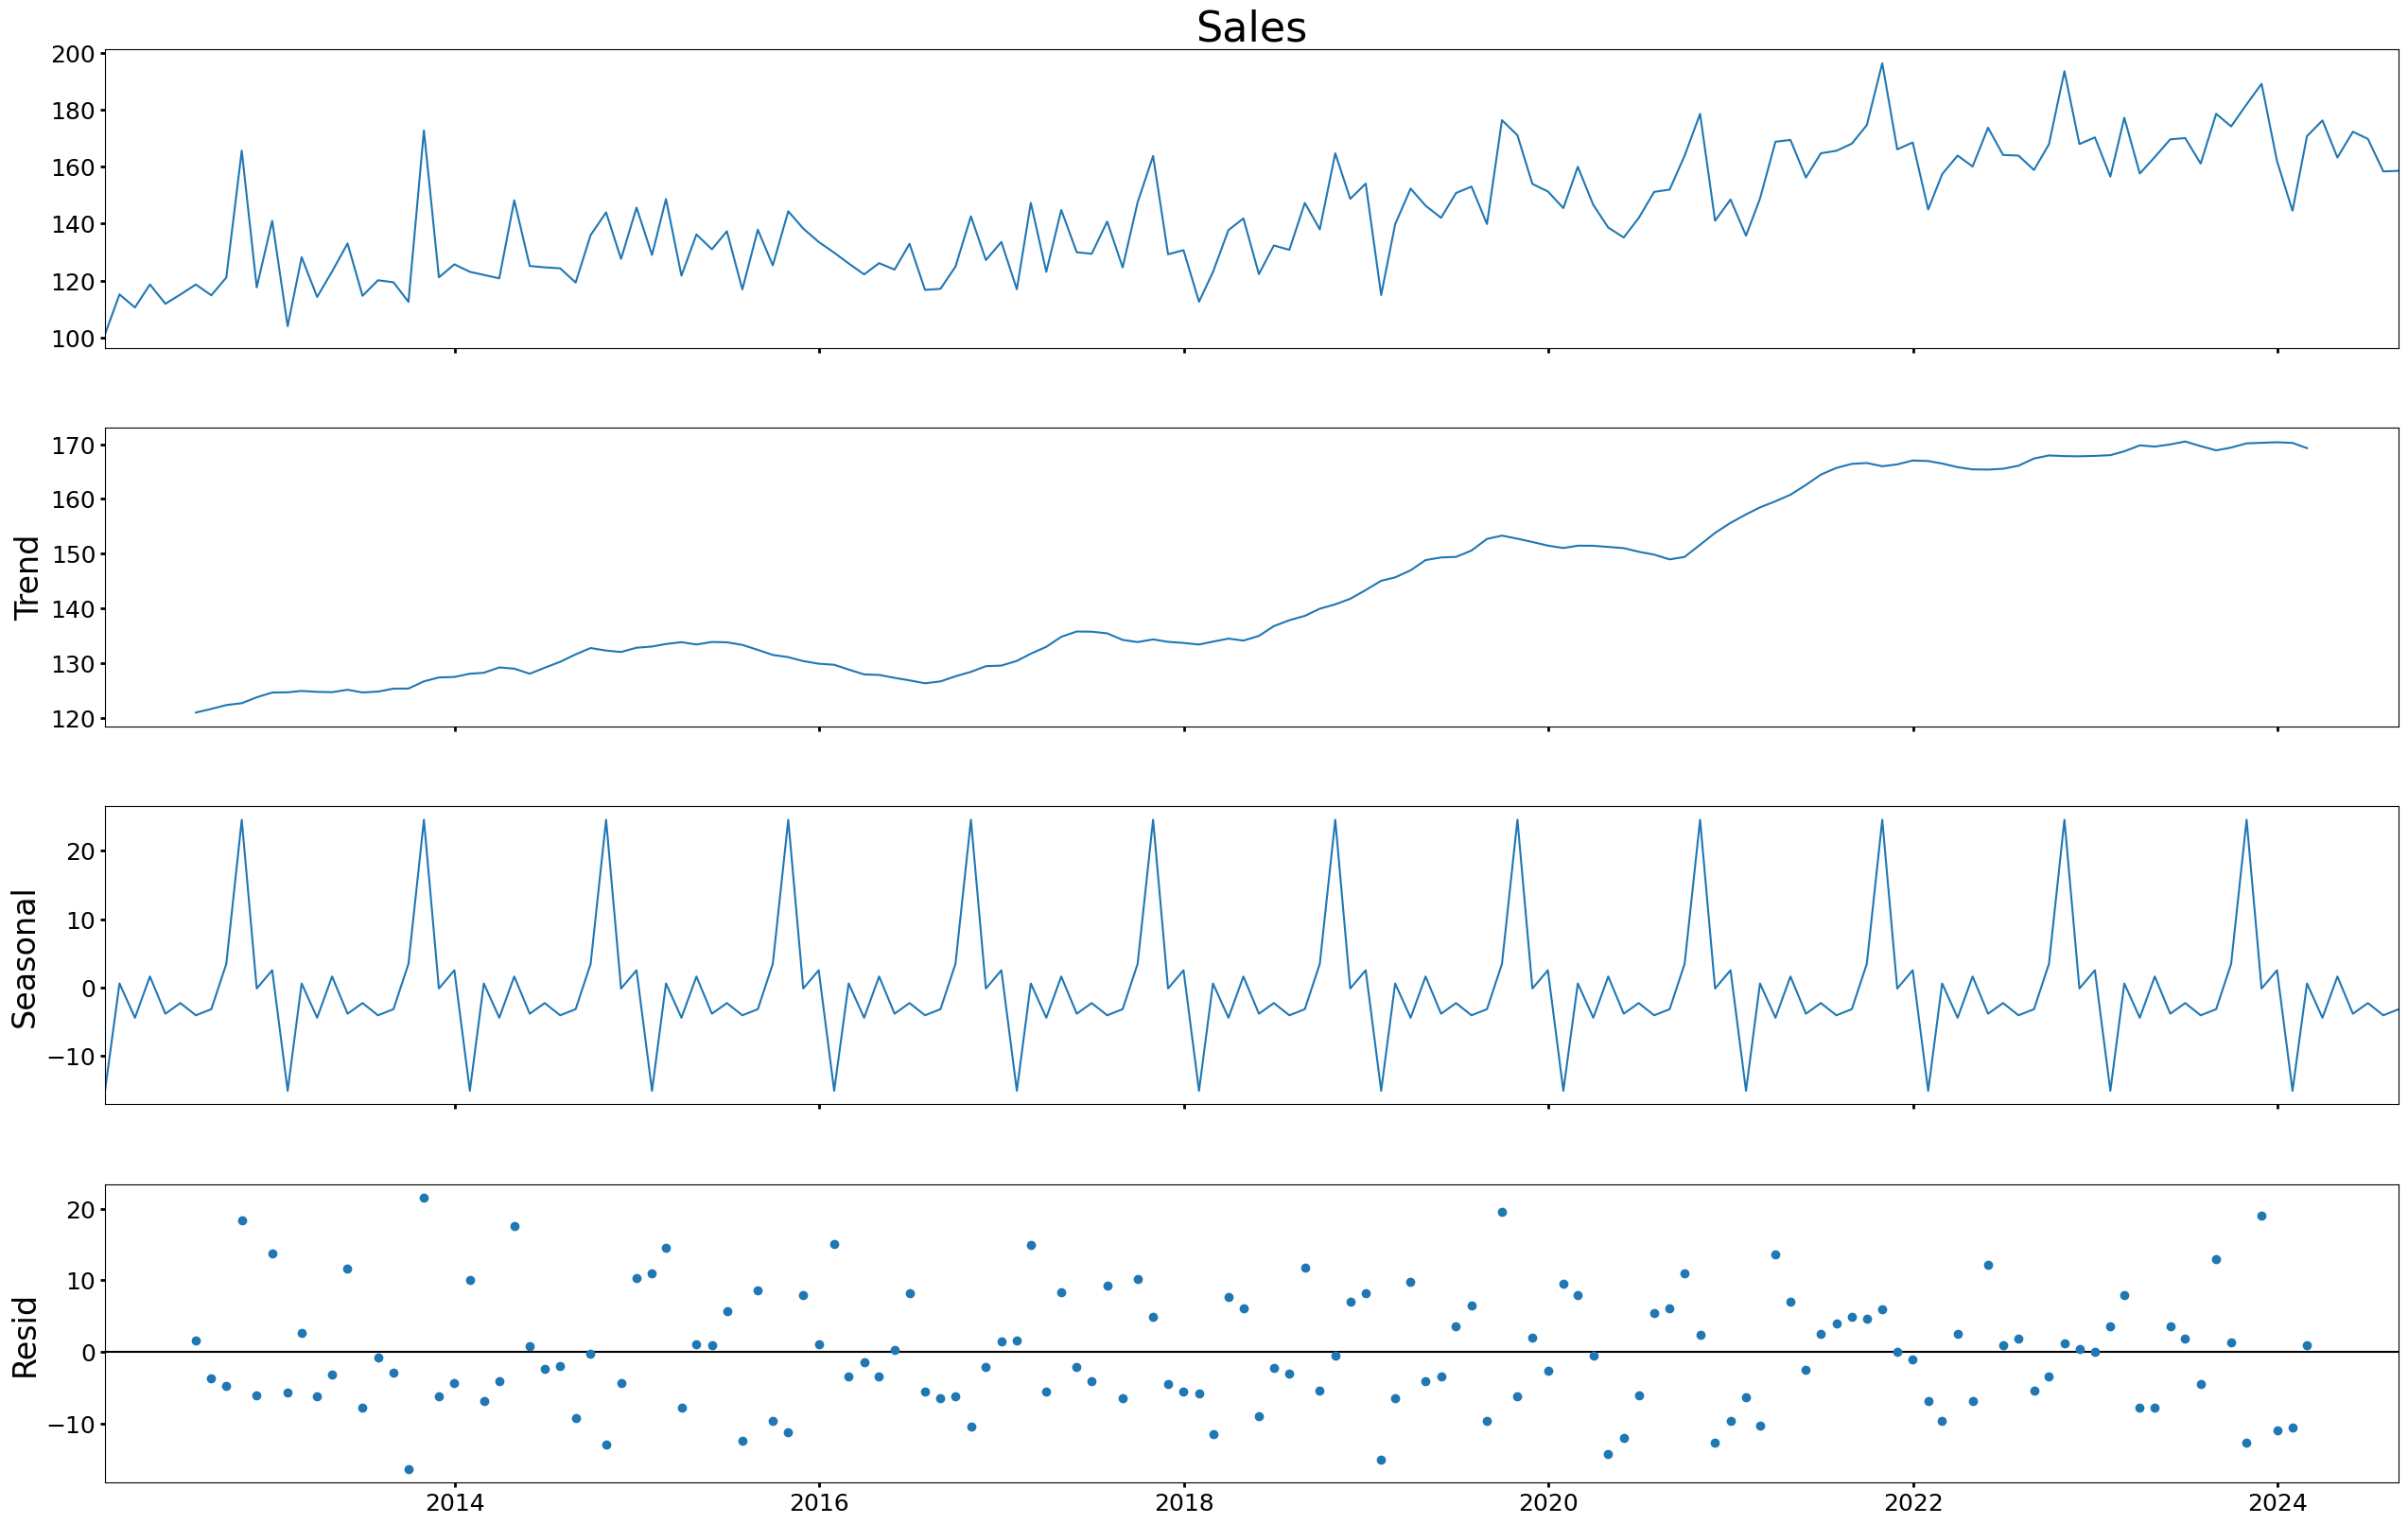

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_timeseries['Sales'],
                                   # model = 'additive',
                                  period = 12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(28, 18)
for ax in fig.axes:
  ax.title.set_size(32)
  ax.xaxis.label.set_size(24)
  ax.yaxis.label.set_size(24)
  ax.tick_params(axis='both', width = 2, labelsize=18)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_results = adfuller(df_timeseries['Sales'], autolag='AIC')

print(f'ADF statistic: {adf_results[0]}')
print(f'p-value: {adf_results[1]}')
print(f'Is the data stationary?: {adf_results[1] < 0.05}')

ADF statistic: -0.268665451047615
p-value: 0.92982649171189
Is the data stationary?: False


Remove trend

In [ ]:
new_df = df_timeseries.diff()
new_df.dropna(inplace=True)

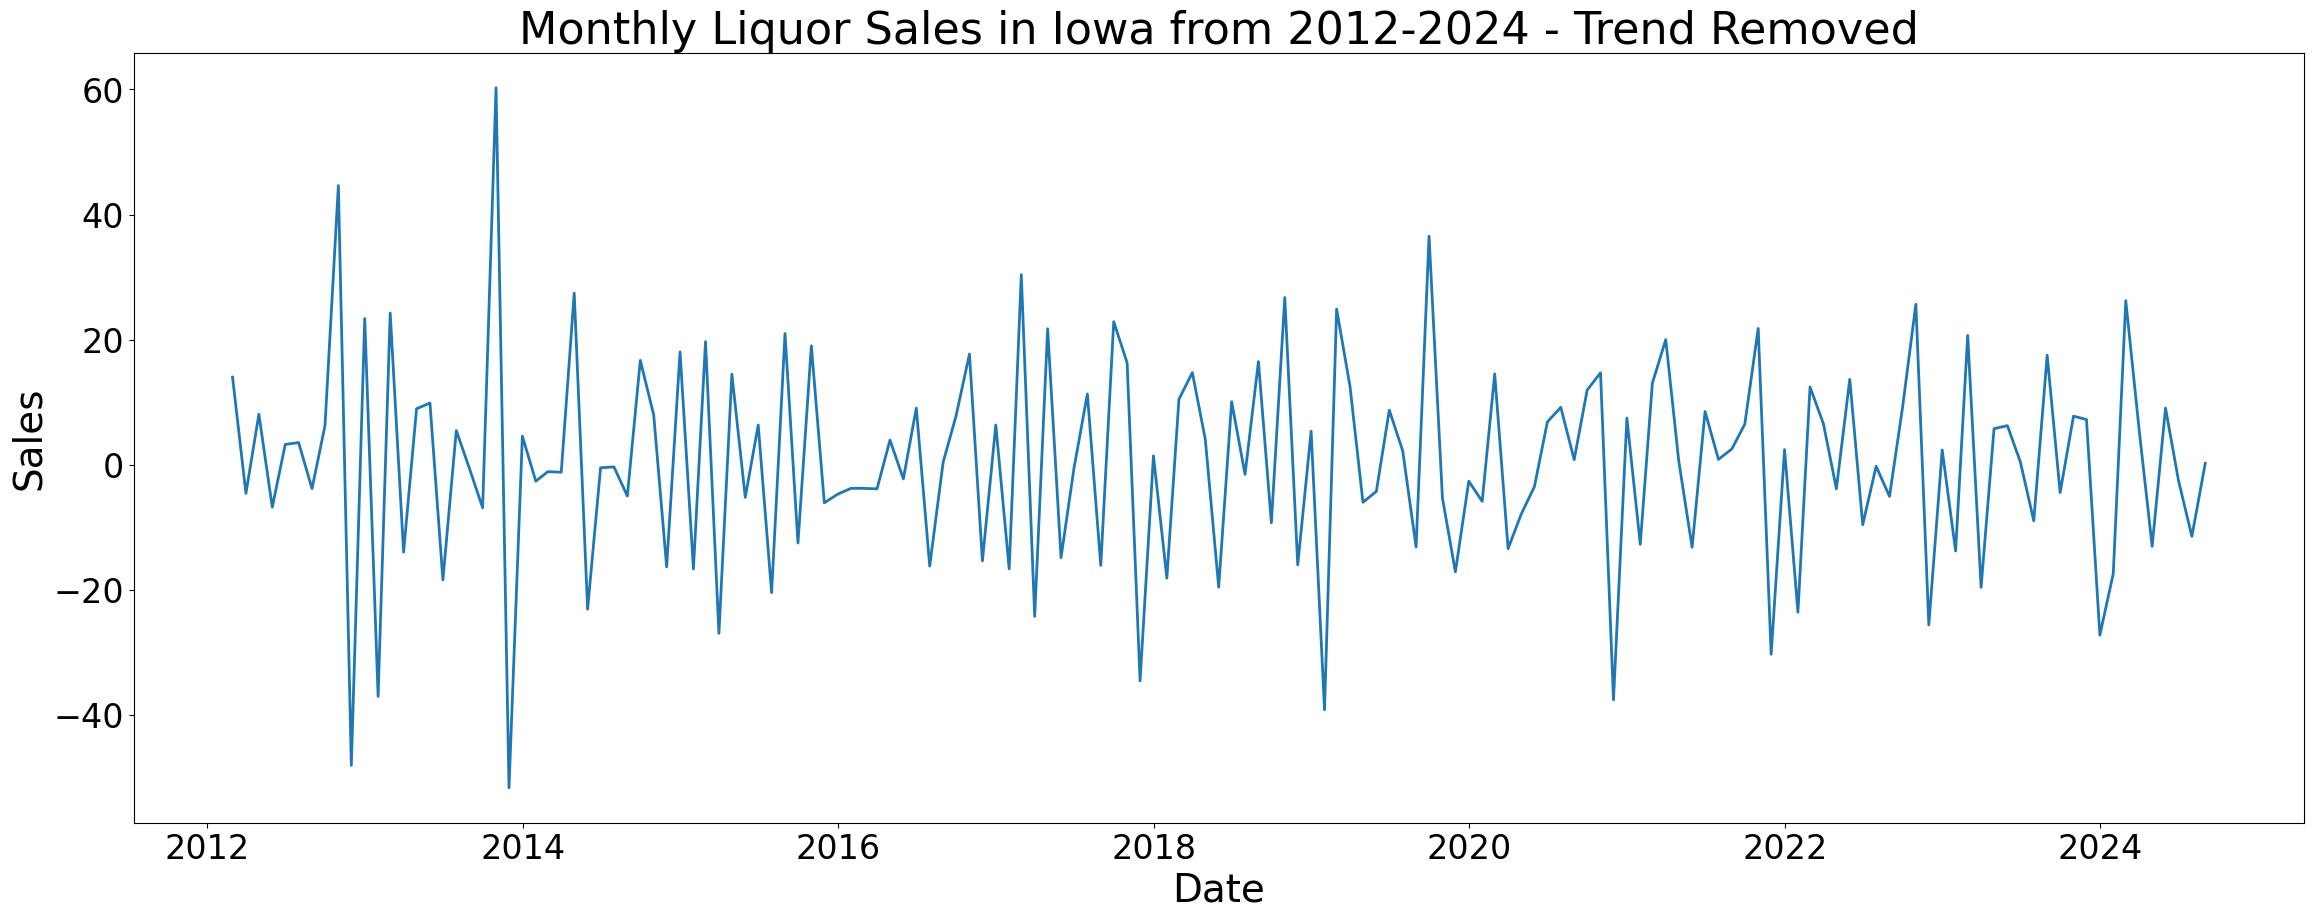

In [ ]:
fig, ax = plt.subplots(figsize = (28,10))
ax.plot(new_df, linewidth = 2)
plt.xlabel("Date", fontsize = 28)
plt.xticks(fontsize = 24)
plt.ylabel("Sales", fontsize = 28)
plt.yticks(fontsize = 24)
plt.title("Monthly Liquor Sales in Iowa from 2012-2024 - Trend Removed", fontsize = 32)
plt.show()

In [ ]:
new_df.size

151

In [ ]:
# unnecessary
# df_lag = train_data['Sales'].diff(periods = 12)

In [ ]:
#adf_results = ad_fuller(df_lag.dropna(), autolag='AIC')
#p_value = adf_results[1]
#print(f'p-value: {p_value}')

ACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

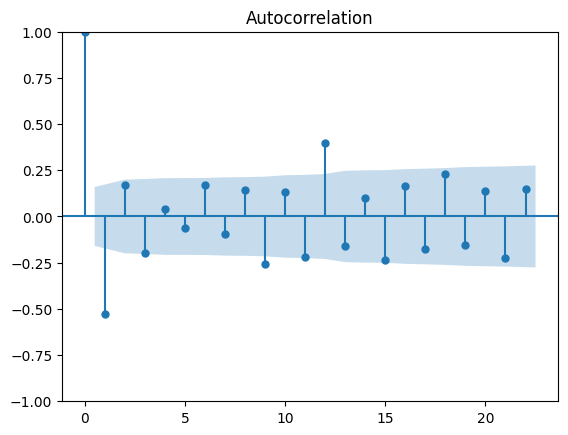

In [ ]:
plot_acf(new_df['Sales'])
plt.show()

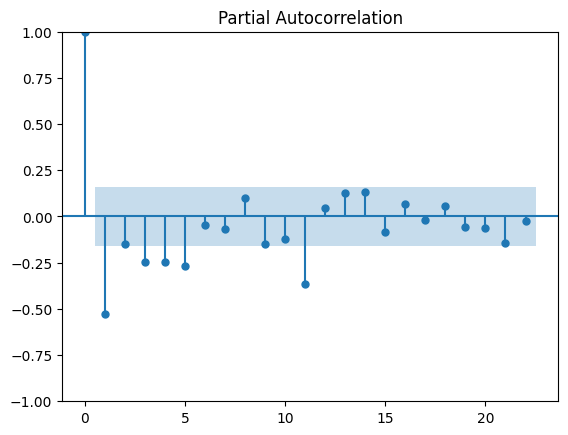

In [ ]:
plot_pacf(new_df['Sales'])
plt.show()

ACF - autocorrelation function, is the correlation of the time series with its lags

PACF - partial autocorrelation function, is the partial correlation of the time series with its lags, after removing the effects of lower-order-lags between them

Fit the SARIMA model

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pmd

In [ ]:
model = pmd.auto_arima(df_timeseries['Sales'], start_p=1, start_q=1,
                      test='adf',
                      m=12,
                      seasonal = True,
                      trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1190.446, Time=3.59 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1359.363, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1220.255, Time=1.90 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1274.799, Time=1.48 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1946.508, Time=0.04 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1204.057, Time=0.92 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1187.181, Time=0.73 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1225.019, Time=0.34 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1172.644, Time=1.64 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=1175.348, Time=1.87 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1215.328, Time=1.16 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1204.397, Time=1.47 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=1175.628, Time=2.05 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=1173.122, Time=5.63 sec
 ARIMA(0,0,0)(2,0,0

In [ ]:
# train test split
# monthly
train_data = df_timeseries.iloc[:140, :]
test_data = df_timeseries.iloc[140:, :]

# daily
#df_train = df_timeseries.iloc[:3012, :]
#df_test = df_timeseries.iloc[3012:, :]
train_data.head()

,Sales
Date,
2012-01-31,101.119912
2012-02-29,115.128578
2012-03-31,110.548983
2012-04-30,118.623991
2012-05-31,111.839279


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train_data['Sales'], order=(1,0,1), seasonal_order=(1,0,1,12))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  140
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -529.521
Date:                            Fri, 04 Oct 2024   AIC                           1069.041
Time:                                    19:01:22   BIC                           1083.749
Sample:                                01-31-2012   HQIC                          1075.018
                                     - 08-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9978      0.003    299.362      0.000       0.991       1.004
ma.L1         -0.8277      0.061   

past predictions

In [ ]:
past_predictions = model_fit.predict()
past_predictions

,predicted_mean
Date,
2012-01-31,0.000000
2012-02-29,100.683834
2012-03-31,107.998354
2012-04-30,108.875648
2012-05-31,111.543763
...,...
2023-04-30,170.352607
2023-05-31,164.498882
2023-06-30,167.452745


predictions to compare to test data

In [ ]:
test_predictions = model_fit.forecast(len(test_data))
test_predictions = pd.Series(test_predictions, index = test_data.index)
residuals = test_data['Sales'] - test_predictions

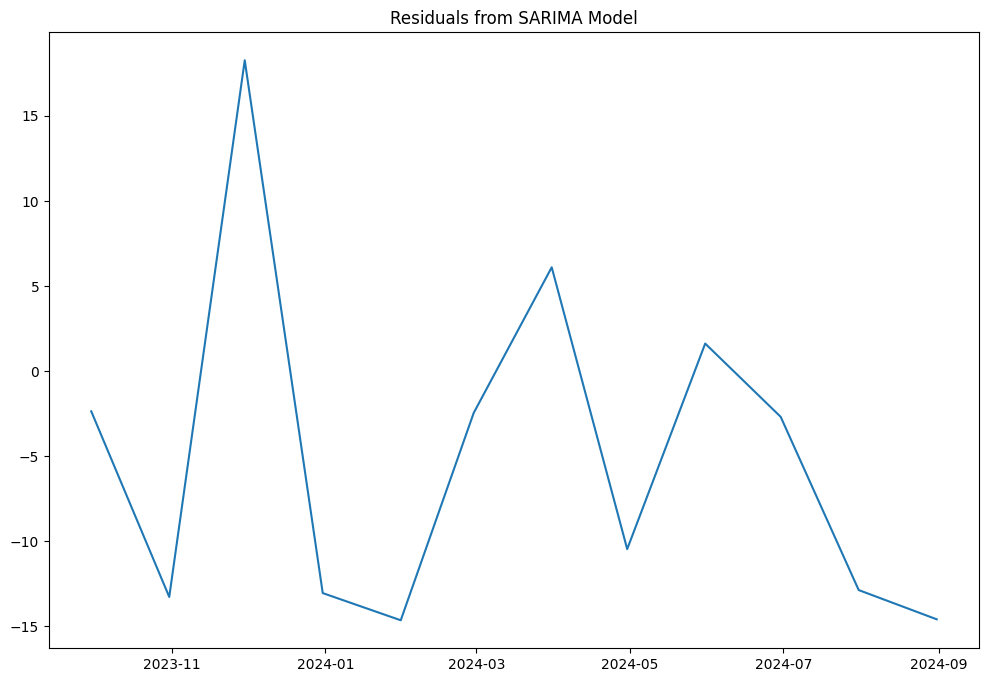

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.show()

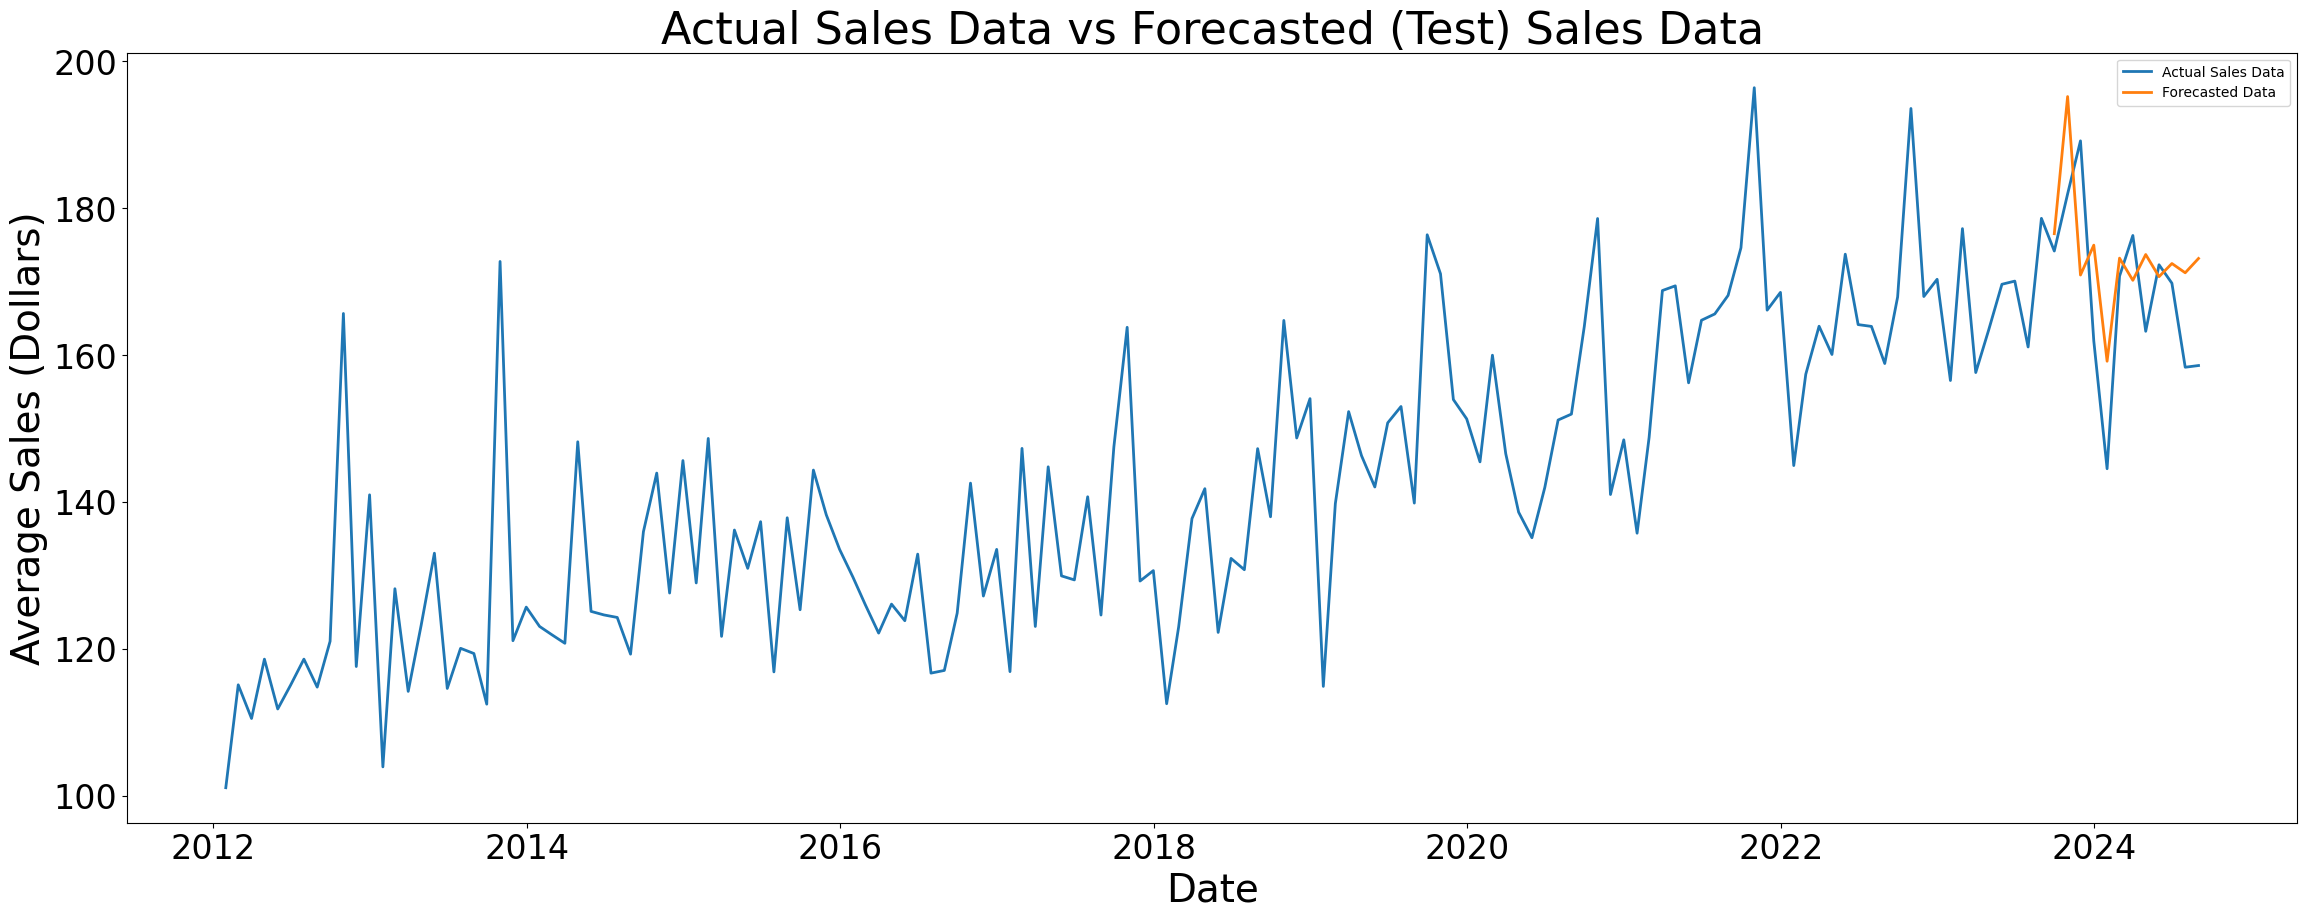

In [ ]:
plt.figure(figsize = (28,10))
plt.plot(df_timeseries['Sales'], label = 'Actual Sales Data', linewidth = 2)
plt.plot(test_predictions, label = 'Forecasted Data', linewidth = 2)
plt.title('Actual Sales Data vs Forecasted (Test) Sales Data', fontsize = 32)
plt.xlabel('Date', fontsize = 28)
plt.ylabel('Average Sales (Dollars)', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
print('Mean Absolute Error:', mae(test_data['Sales'], test_predictions) )

Mean Absolute Error: 9.35919496311193


In [ ]:
from sklearn.metrics import root_mean_squared_error as rmse
print('Root Mean Squared Error:', rmse(test_data['Sales'], test_predictions))

Root Mean Squared Error: 10.95263766272886


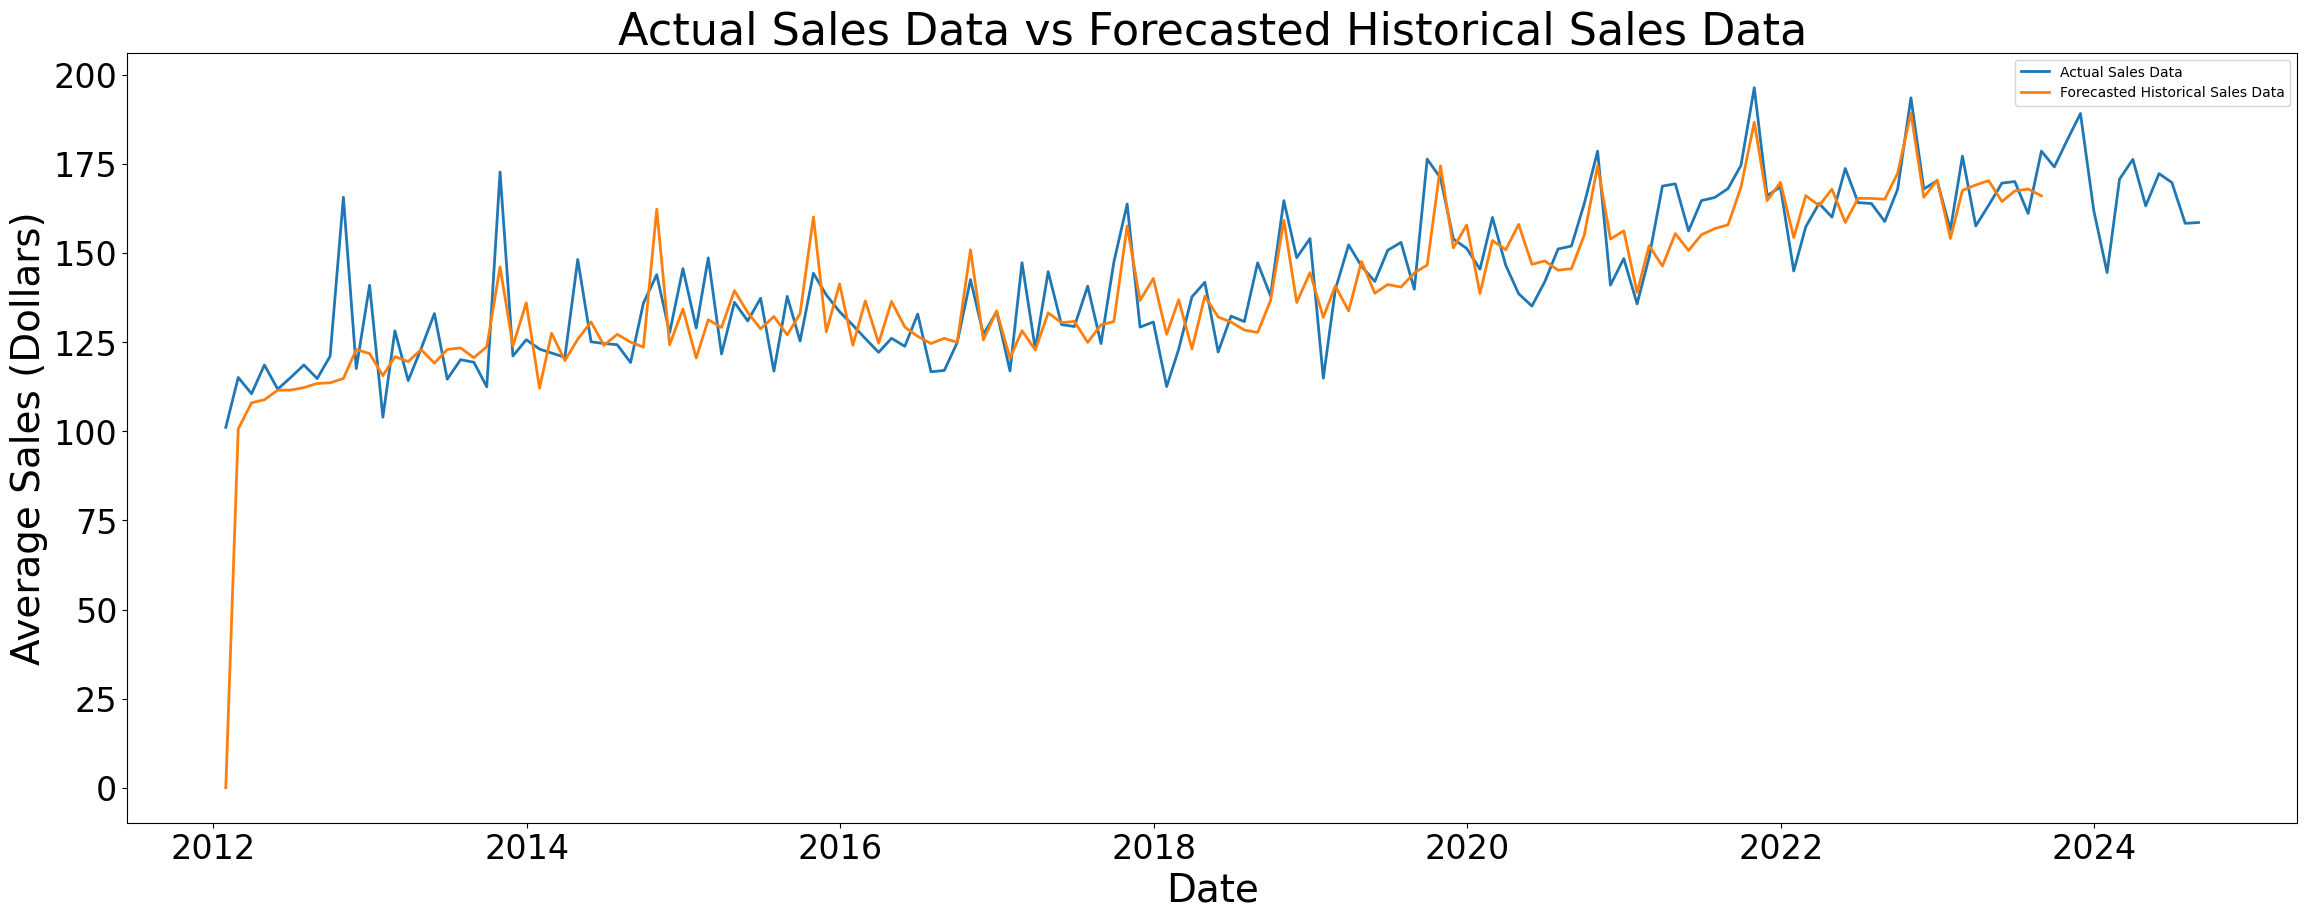

In [ ]:
plt.figure(figsize=(28,10))
plt.plot(df_timeseries['Sales'], label = 'Actual Sales Data', linewidth = 2)
plt.plot(past_predictions, label = 'Forecasted Historical Sales Data', linewidth = 2)
plt.title('Actual Sales Data vs Forecasted Historical Sales Data', fontsize = 32)
plt.xlabel('Date', fontsize = 28)
plt.ylabel('Average Sales (Dollars)', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend()

predictions beyond current data

In [ ]:
model_a = pmd.auto_arima(train_data['Sales'], start_p=1, start_q=1,
                      test='adf',
                      m=12,
                      seasonal = True,
                      trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1189.488, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1107.103, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1094.133, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1187.634, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1111.293, Time=0.49 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=8.32 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1083.541, Time=3.07 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1057.056, Time=11.86 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=13.85 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=6.93 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=8.02 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=1059.997, Time=7.59 sec
 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=5.04 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf,

In [ ]:
# forecast past testing data
model_a.fit(test_data['Sales'])
future_predictions = model_a.predict(n_periods = 12)
future_predictions

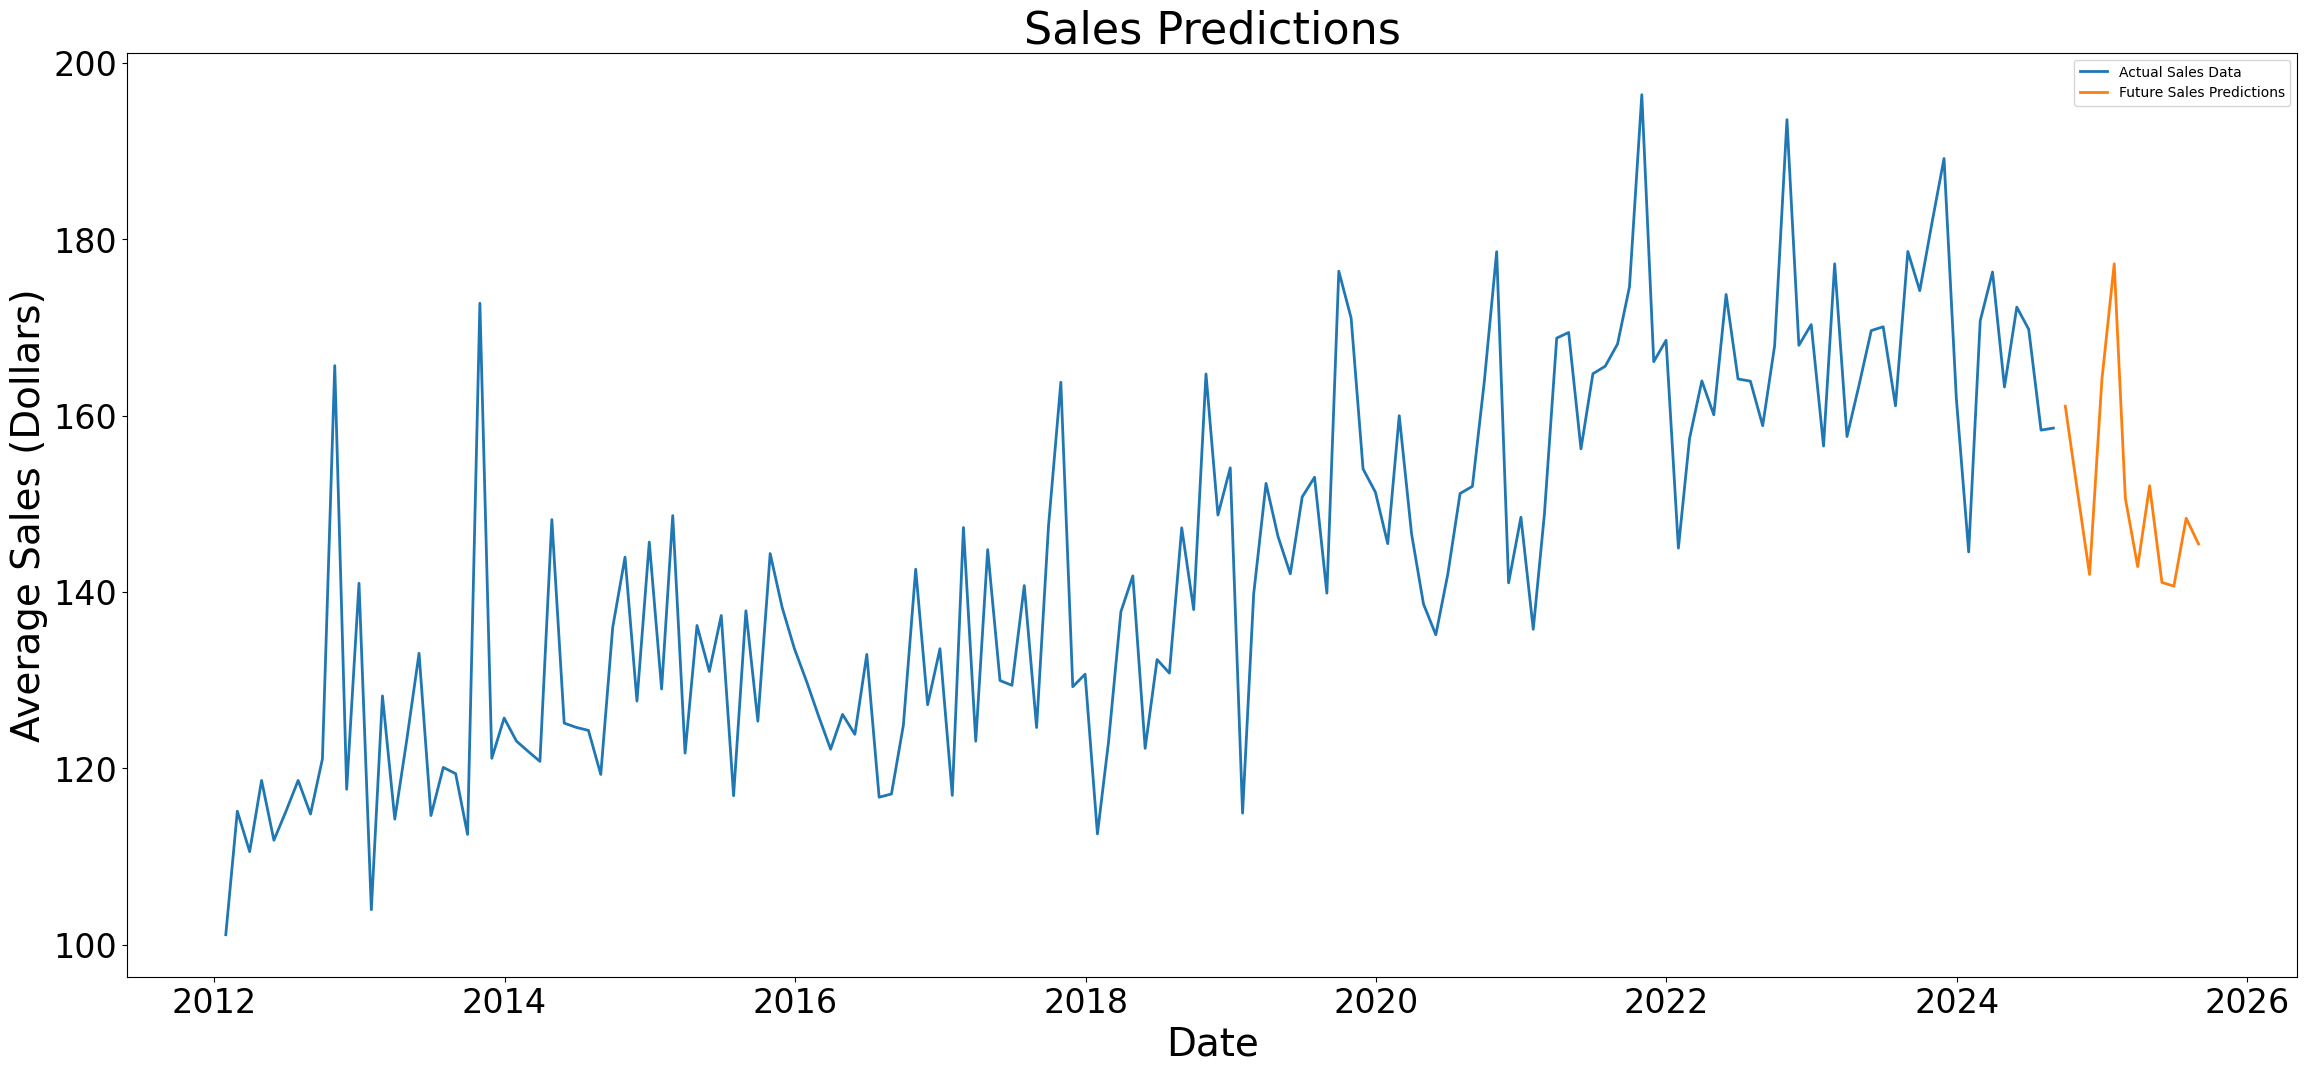

In [ ]:
plt.figure(figsize = (28,12))
plt.plot(df_timeseries['Sales'], label = 'Actual Sales Data', linewidth = 2)
plt.plot(future_predictions, label = 'Future Sales Predictions', linewidth = 2)
plt.title('Sales Predictions', fontsize = 32)
plt.xlabel('Date', fontsize = 28)
plt.ylabel('Average Sales (Dollars)', fontsize = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.legend()